<a href="https://colab.research.google.com/github/gopalm-ai/Quantum_Machine_Learning_An_Applied_Approach/blob/main/qiskitStateEvo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip3 install qiskit

     |████████████████████████████████| 6.4 MB 6.8 MB/s 
     |████████████████████████████████| 18.0 MB 475 kB/s 
     |████████████████████████████████| 238 kB 57.9 MB/s 
     |████████████████████████████████| 200 kB 49.8 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 1.4 MB 54.4 MB/s 
     |████████████████████████████████| 943 kB 60.6 MB/s 
     |████████████████████████████████| 38.2 MB 1.1 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 3.6 MB 49.9 MB/s 
     |████████████████████████████████| 112 kB 59.5 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.1-py3-none-any.whl size=11771 sha256=0d04b840a107e35c8d484fc11632662a241d9f166d394968cab1e343bdf6213b
  Stored in directory: /root/.cache/pip/wheels/79/b1/3f/8cdfd5543a84705e4bd16e081f2362b9b3bfd9898d2e2d

In [18]:
# Import Libraries
import numpy as np
from qiskit import *
import math as m
from scipy import linalg as la
%matplotlib inline

In [19]:
# Define Spin-up
u = np.matrix([[1],[0]])
# Define Spin-down
d = np.matrix([[0],[1]])
# Define the pure state |0><0|
P11 = np.dot(u,u.H)
# Define the pure state |0><1|
P12 = np.dot(u,d.H)
# Define the pure state |1><0|
P21 = np.dot(d,u.H)
# Define the pure state |1><1|
P22 = np.dot(d,d.H)
# Define the mixed state |0><0|+|1><1|
I = (P11+P22)/2
# Define the pure state |0><0|+|0><1|+|1><0|+|1><1|
D = (P11+P12+P21+P22)/2

In [21]:
import matplotlib.pyplot as plt
p = np.arange(0.001, 1, 0.01)

In [26]:
def von_neumann_entropy(mat):
  sum = 0
  for elem in la.eigvalsh(mat):
    sum += elem*m.log(elem,2)
  return -1*sum

In [27]:
# create list of von Neumann entropies
vn_y = list()
for value in p:
  rho_p = value*P11 + (1-value)*P22
  vn_y.append(von_neumann_entropy(rho_p))

In [29]:
# list of matrices to list numbers for plotting
y = list()
for value in vn_y:
  #y.append(value.tolist()[0][0])
  y.append(value.tolist())


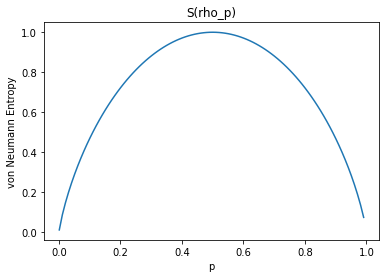

In [30]:
# plot p vs S(rho_p)
plt.xlabel('p')
plt.ylabel('von Neumann Entropy')
plt.title('S(rho_p)')
plt.plot(p, y, color='tab:blue')
plt.show()

In [32]:
# create list of von Neumann entropies
vn_y = list()
for value in p:
  rho_p = value*I + (1-value)*D
  vn_y.append(von_neumann_entropy(rho_p))

In [34]:
# list of matrices to list numbers for plotting
y = list()
for value in vn_y:
  y.append(value.tolist())

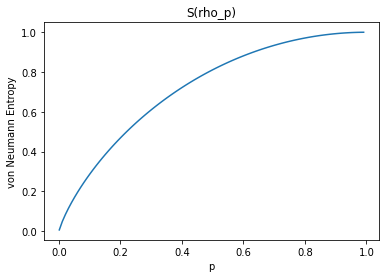

In [35]:
# plot p vs S(rho_p)
plt.xlabel('p')
plt.ylabel('von Neumann Entropy')
plt.title('S(rho_p)')
plt.plot(p, y, color='tab:blue')
plt.show()